# INTRODUCTION

In the contemporary automotive market, accurately predicting car prices is crucial for various stakeholders including car dealers, buyers, manufacturers, and insurance companies. The dataset at hand, "Car_price_2024.csv," encompasses a range of features such as car specifications, conditions, and additional attributes. These features provide a comprehensive basis for developing predictive models that can estimate car prices accurately. The dataset includes both numerical and categorical variables, and contains some missing values that need to be addressed before model development.

The primary objective is to preprocess the data effectively and implement supervised and unsupervised machine learning techniques to predict car prices. Additionally, an error cost analysis will be performed to understand the impact of prediction errors from the perspective of different stakeholders. This analysis is critical in identifying which type of error—false positives or false negatives—would be more detrimental to each stakeholder group, guiding us towards creating more reliable and beneficial predictive models.

# What is the Problem?

The problem at hand is understanding the factors that influence car prices and predicting the price of a car based on various attributes.

# Who are the Stakeholders?

The stakeholders include:

Car Manufacturers:
To understand market pricing and position their products competitively.

Dealerships and Salespersons: 
To price their cars accurately for maximizing sales and profits.

Consumers: 
To make informed decisions when buying a car.

Data Analysts and Researchers: 
To derive insights and trends from the automotive market data.

# Why Does This Problem Matter to Each Stakeholder?

Car Manufacturers: 
Accurate pricing helps in aligning the product with market demand and optimizing profits.

Dealerships and Salespersons:
Helps in setting competitive prices to attract customers while ensuring profitability.

Consumers: 
Ensures they get fair value for money when purchasing a car.

Data Analysts and Researchers:
Provides a rich dataset to analyze trends, derive insights, and build predictive models.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Car_price_2024.csv')
df.head()

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,Nissan Altima,2007,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,8005.469674,two,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000,36245.697
1,Toyota Corolla,2019,Electric,Manual,4.0,Excellent,Beige,Yes,No,Yes,...,25385.241860,two,-0.001383,2.696626,3543.00629,182.1,60.0,894.742606,4689,10736.91127
2,Honda CR-V,2004,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,6553.601733,three,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190,41953.92523
3,Toyota Corolla,2020,Electric,Manual,4.0,Good,Brown,Yes,Yes,Yes,...,24381.083350,three,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720,12446.97569
4,Toyota Tundra,2017,Hybrid,Automatic,4.0,Good,Brown,Yes,No,No,...,28357.830640,five,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559,10560.54904


In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Model                0
Year                 0
Fuel_Type            3
Transmission         7
DoorsNum             7
Condition            0
Color                2
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               1
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64


# Handling the missing data

In [4]:
# Fuel_Type mode to fill the missing data
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
Fuel_Type_mode = df['Fuel_Type'].mode()[0]
df['Fuel_Type'].fillna(Fuel_Type_mode, inplace=True)
df['Fuel_Type']

0         Petrol
1       Electric
2         Petrol
3       Electric
4         Hybrid
          ...   
2225    Electric
2226      Petrol
2227      Hybrid
2228      Petrol
2229      Petrol
Name: Fuel_Type, Length: 2230, dtype: category
Categories (4, object): ['Electric', 'Hybrid', 'Petrol', 'Petroll']

In [5]:
# Transmission mode to fill the missing data
df['Transmission'] = df['Transmission'].astype('category')
Transmission_mode = df['Transmission'].mode()[0]
df['Transmission'].fillna(Transmission_mode, inplace=True)
df['Transmission']

0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
2225    Automatic
2226       Manual
2227    Automatic
2228       Manual
2229       Manual
Name: Transmission, Length: 2230, dtype: category
Categories (4, object): ['AutoNamatic', 'Automatic', 'Manual', 'Na']

As DoorsNum is numerical data type variable, mean is to be used but mean gives values in decimals, we will use mode for exact number

In [6]:
df['DoorsNum'] = df['DoorsNum'].astype('category')
DoorsNum_mode = df['DoorsNum'].mode()[0]
df['DoorsNum'].fillna(DoorsNum_mode, inplace=True)
df['DoorsNum']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
2225     4.0
2226     4.0
2227    20.0
2228     4.0
2229     4.0
Name: DoorsNum, Length: 2230, dtype: category
Categories (6, float64): [2.0, 4.0, 20.0, 22.0, 40.0, 44.0]

In [7]:
# Color mode to fill the missing data
df['Color'] = df['Color'].astype('category')
Color_mode = df['Color'].mode()[0]
df['Color'].fillna(Color_mode, inplace=True)
df['Color']

0        Brown
1        Beige
2        Brown
3        Brown
4        Brown
         ...  
2225    Silver
2226     Black
2227    Yellow
2228     Brown
2229    Yellow
Name: Color, Length: 2230, dtype: category
Categories (7, object): ['Beige', 'Black', 'Brown', 'Brwn', 'Silver', 'White', 'Yellow']

In [8]:
df['Weight'].replace("-",0)

0       3170.460434
1        3543.00629
2       3125.542396
3       3340.060049
4       3847.825597
           ...     
2225    4157.519949
2226    3058.960939
2227    3503.415954
2228    3748.991341
2229    3422.936265
Name: Weight, Length: 2230, dtype: object

In [9]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [10]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Weight']

0       3170.460434
1       3543.006290
2       3125.542396
3       3340.060049
4       3847.825597
           ...     
2225    4157.519949
2226    3058.960939
2227    3503.415954
2228    3748.991341
2229    3422.936265
Name: Weight, Length: 2230, dtype: float64

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Model                0
Year                 0
Fuel_Type            0
Transmission         0
DoorsNum             0
Condition            0
Color                0
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               0
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64


# Data Set and Visualization

Type of the Dataset:

The dataset is a structured CSV file that includes various attributes of cars along with their prices. It is a tabular dataset suitable for analysis and machine learning tasks.

Dimensions of the Dataset:

The dataset comprises 32 columns, with 10 chosen predictor variables for this analysis.

# Variables, Definitions, Their Types, and Their Roles

1. Year (Numeric): The manufacturing year of the car (Predictor).

2. Fuel_Type (Categorical): Type of fuel used (Petrol, Electric, Hybrid, etc.) (Predictor).

3. Transmission (Categorical): Type of transmission (Manual, Automatic) (Predictor).

4. Condition (Categorical): Condition of the car (Fair, Good, Excellent) (Predictor).

5. Engine_Size (Numeric): Size of the engine (Predictor).

6. Weight (Numeric): Weight of the car (Predictor).

7. DoorsNum (Numeric): Number of doors in the car (Predictor).

8. Leather_Seats (Categorical): Presence of leather seats (Yes, No) (Predictor).

9. Heated_Seats (Categorical): Presence of heated seats (Yes, No) (Predictor).

10. Estimated_Mileage (Numeric): Estimated total mileage (Predictor).

11. Price (Numeric): The price of the car (Target).


# Verbal Presentation of At Least Two Records

1. Record 1: A 2007 Nissan Altima with a petrol engine, manual transmission, 4 doors, fair condition, brown color, no cruise control, no leather seats, no heated seats. It has an engine size of 1.655688, weight of 3170.460434, and estimated mileage of 36245.697, priced at $8005.47.

2. Record 2: A 2019 Toyota Corolla with an electric engine, manual transmission, 4 doors, excellent condition, beige color, cruise control, no leather seats, heated seats. It has an engine size of 2.696626, weight of 3543.00629, and estimated mileage of 10736.91127, priced at $25385.24.

# Level of the Data, What is Each Record About?

Each record in the dataset represents a unique car with various attributes describing its specifications, condition, and price.

# Uni-variate Visualization and Commenting

# Price Distribution
Let's visualize the distribution of car prices.

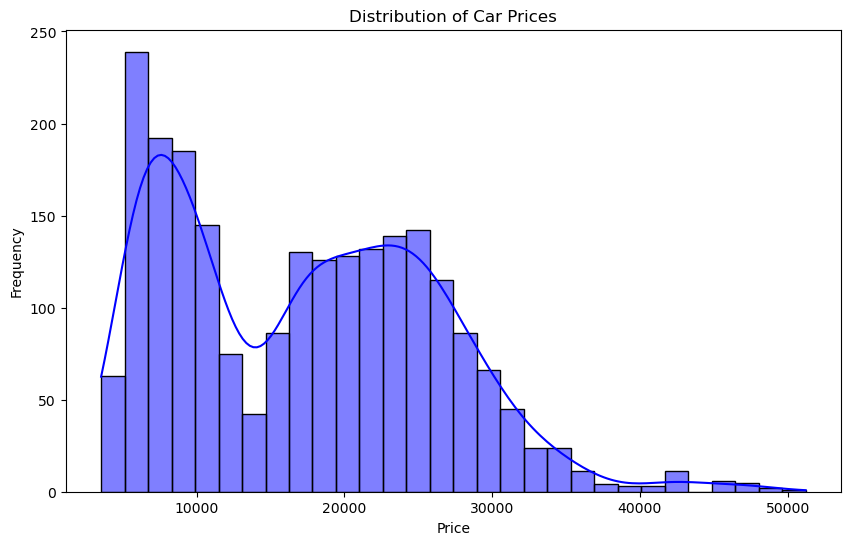

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Univariate visualization of car prices
sns.histplot(df['Price'], kde=True, color='blue', bins=30)

# Add titles and labels
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show plot
plt.show()

The distribution of car prices shows a right-skewed pattern, indicating that while most cars are priced within a lower range, there are a few high-priced cars.

# Measures of Centrality and Spread
MEAN PRICE: The average price of the cars.

MEDIAN PRICE: The middle value of the car prices when arranged in order.

STANDARD DEVIATION: Measures the spread of the car prices around the mean.

In [13]:
# Calculate measures of centrality and spread for car prices
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_price = df['Price'].std()

mean_price, median_price, std_price

(17241.51104836547, 17393.385485, 8961.471366791226)

The measures of centrality and spread for car prices are as follows:

Mean Price: $17,241.51

Median Price: $17,393.39

Standard Deviation: $8,961.47

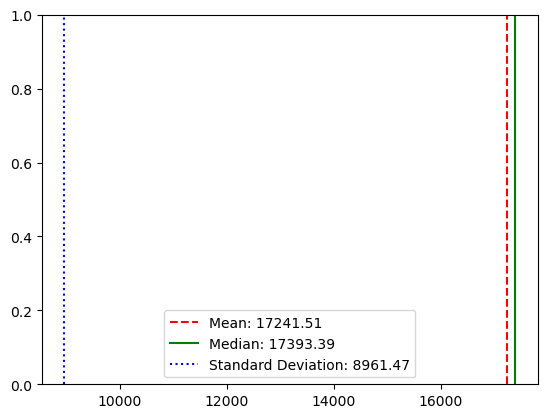

In [14]:
# Annotate the mean and median
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'Median: {median_price:.2f}')
plt.axvline(std_price, color='blue', linestyle=':', label=f'Standard Deviation: {std_price:.2f}')

plt.legend()
plt.show()

# Commentary on Uni-variate Visualization

The price distribution is right-skewed, with most car prices concentrated at the lower end of the range. The mean price is $17,241.51, the median price is $17,393.39, and the standard deviation is $8,961.47, indicating a significant spread in car prices.

# Bi-variate Visualization and Commenting

# Price vs. Year

Let's visualize the relationship between car prices and the manufacturing year.

# 1. Year

Summary Statistics:

In [15]:
df['Year'].describe()

count    2230.000000
mean     2009.702242
std         5.676737
min      2000.000000
25%      2005.000000
50%      2009.000000
75%      2014.000000
max      2022.000000
Name: Year, dtype: float64

Minimum year is 2000 and maximum year is 2022 to show the betterment based on the outcome

Distribution: Histogram to see the distribution of manufacturing years.

Trend Analysis: Line plot to see how car prices have changed over the years.

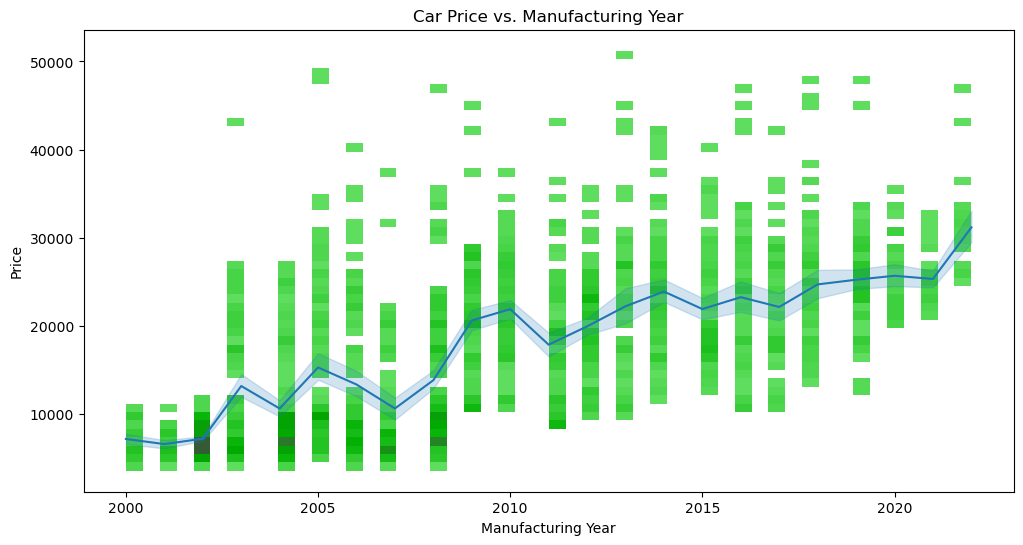

In [16]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs year
sns.histplot(x=df['Year'], y=df['Price'], kde=True, color='green', bins=50)
sns.lineplot(x=df['Year'], y=df['Price'])

# Add titles and labels
plt.title('Car Price vs. Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')

# Show plot
plt.show()

From the plots of car prices versus the manufacturing year, we can observe that newer cars tend to have higher prices, suggesting a positive correlation between the year of manufacture and car price. This indicates that the manufacturing year has predictive power for car prices.

In [17]:
# (i) Build a contingency table of two potentially related categorical variables.
cont_table = pd.crosstab(df['Year'],df['Price'])
cont_table

Price,3527.516896,3533.511758,3796.988479,3894.720913,4056.030693,4091.243226,4161.363456,4167.663126,4281.703974,4282.508865,...,45348.703130,45794.891860,46526.624040,47004.570940,47325.427980,47838.481560,47931.017850,48348.751470,48611.419710,51219.220660
Year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
# Compute correlation between two specific columns
df_corr = df['Year'].corr(df['Price'])
print("Correlation between Year and Price:", df_corr)

Correlation between Year and Price: 0.62314049013745


Correlation between two variables is moderate as the value is almost near +1 which indicates positive correlation

# 2. Fuel_Type (Categorical)

Frequency Distribution: Bar plot showing the count of each fuel type

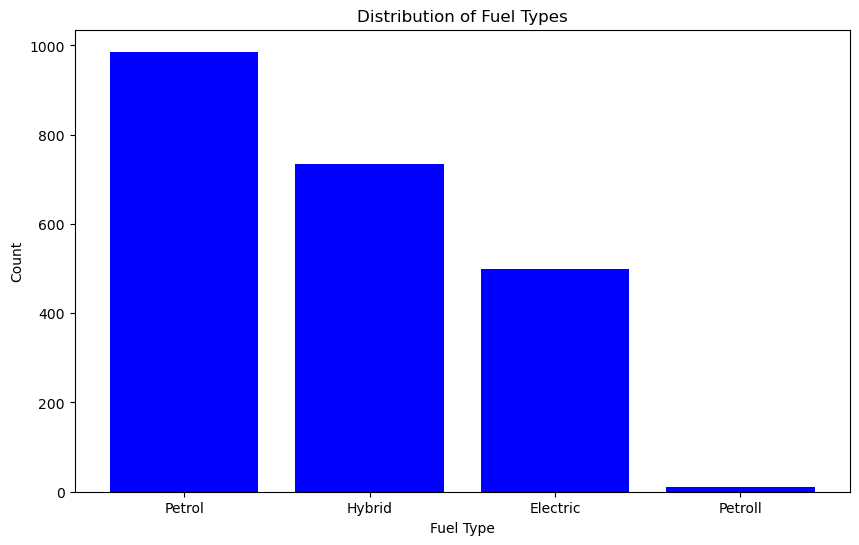

In [19]:
# Count the occurrences of each fuel type
fuel_type_counts = df['Fuel_Type'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(fuel_type_counts.index, fuel_type_counts.values, color='blue')

# Add titles and labels
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices across different fuel types.

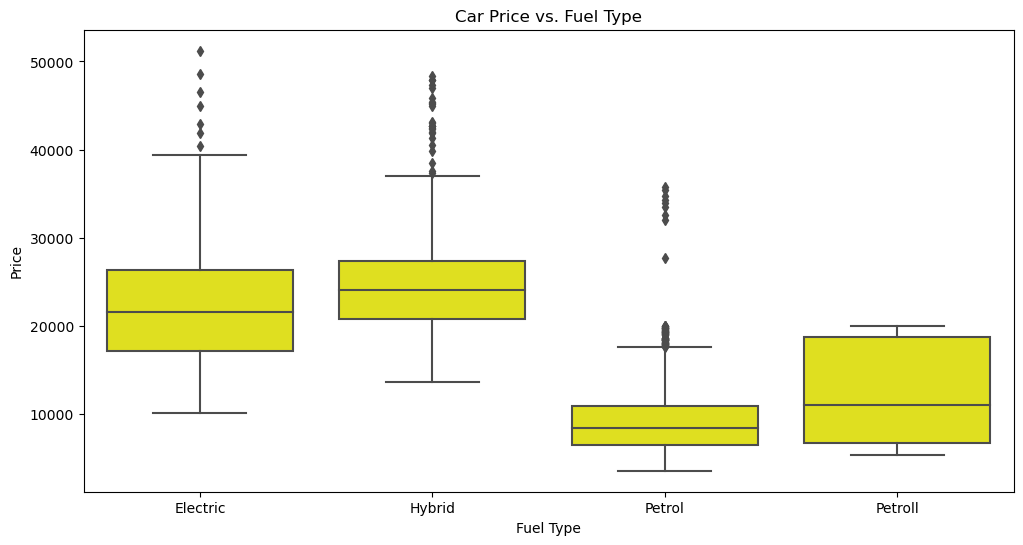

In [20]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Fuel Type
sns.boxplot(x=df['Fuel_Type'], y=df['Price'], color='yellow')

# Add titles and labels
plt.title('Car Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Fuel_Type and Price.

In [21]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Fuel_Type'])

# Display the cross tabulation
print(cross_tab)

Fuel_Type     Electric  Hybrid  Petrol  Petroll
Price                                          
3527.516896          0       0       1        0
3533.511758          0       0       1        0
3796.988479          0       0       1        0
3894.720913          0       0       1        0
4056.030693          0       0       1        0
...                ...     ...     ...      ...
47838.481560         0       1       0        0
47931.017850         0       1       0        0
48348.751470         0       1       0        0
48611.419710         1       0       0        0
51219.220660         1       0       0        0

[2230 rows x 4 columns]


C:\Users\bhara\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


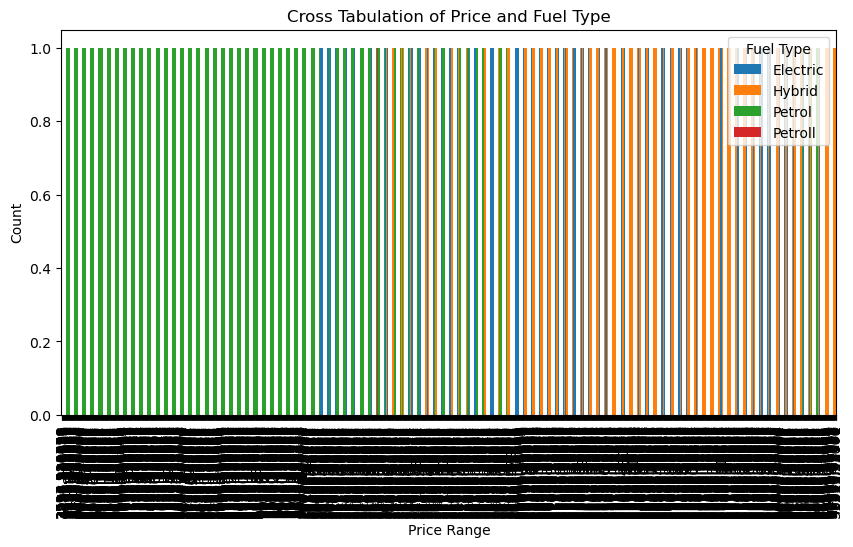

In [22]:
import matplotlib.pyplot as plt

# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and Fuel Type')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Fuel Type')

# Show plot
plt.show()

# 3. Transmission (Categorical)

Frequency Distribution: Bar plot showing the count of each transmission type.

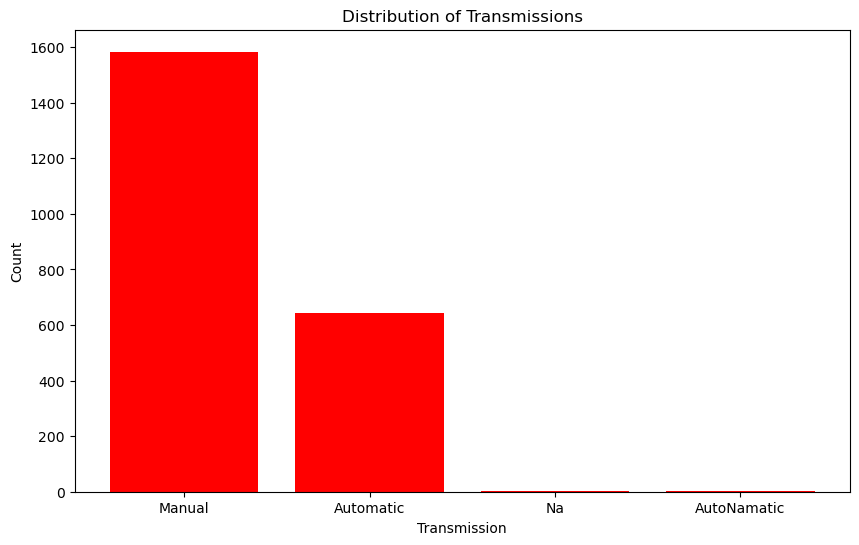

In [23]:
# Count the occurrences of each Transmission
Transmission_counts = df['Transmission'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(Transmission_counts.index, Transmission_counts.values, color='red')

# Add titles and labels
plt.title('Distribution of Transmissions')
plt.xlabel('Transmission')
plt.ylabel('Count')

# Show plot
plt.show()

Frequency Distribution: Bar plot showing the count of each transmission type.

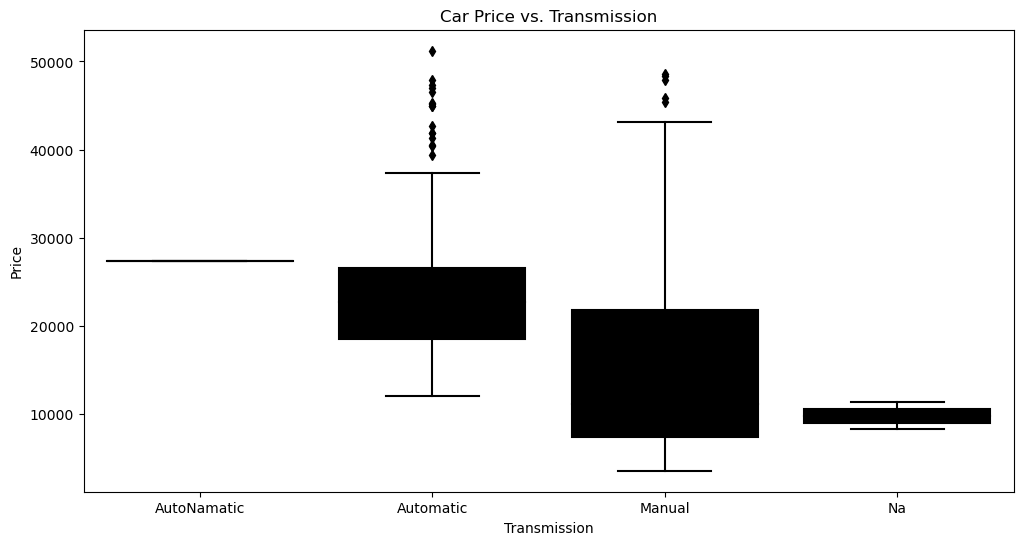

In [24]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Transmission
sns.boxplot(x=df['Transmission'], y=df['Price'], color='black')

# Add titles and labels
plt.title('Car Price vs. Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Transmission and Price.

In [25]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Transmission'])

# Display the cross tabulation
print(cross_tab)

Transmission  AutoNamatic  Automatic  Manual  Na
Price                                           
3527.516896             0          0       1   0
3533.511758             0          0       1   0
3796.988479             0          0       1   0
3894.720913             0          0       1   0
4056.030693             0          0       1   0
...                   ...        ...     ...  ..
47838.481560            0          0       1   0
47931.017850            0          1       0   0
48348.751470            0          0       1   0
48611.419710            0          0       1   0
51219.220660            0          1       0   0

[2230 rows x 4 columns]


C:\Users\bhara\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


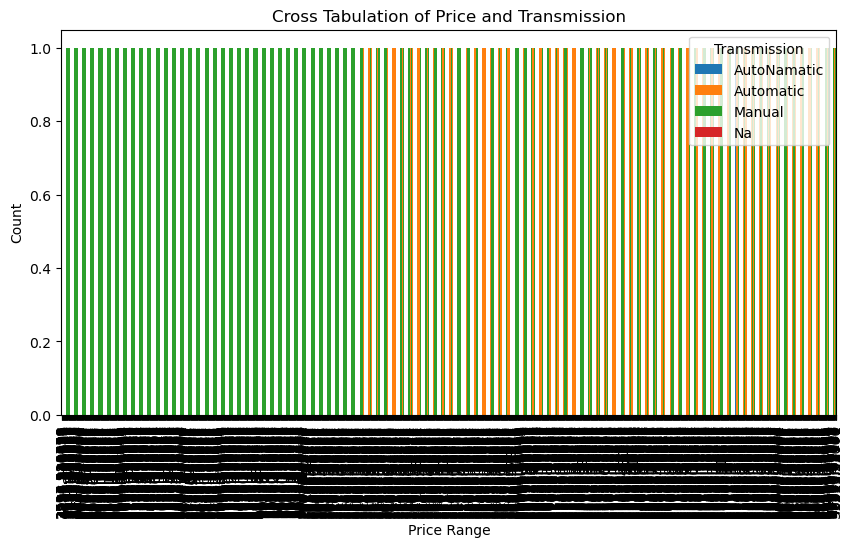

In [26]:
# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and Transmission')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Transmission')

# Show plot
plt.show()

# 4. Condition (Categorical)

Frequency Distribution: Bar plot showing the count of each condition category.

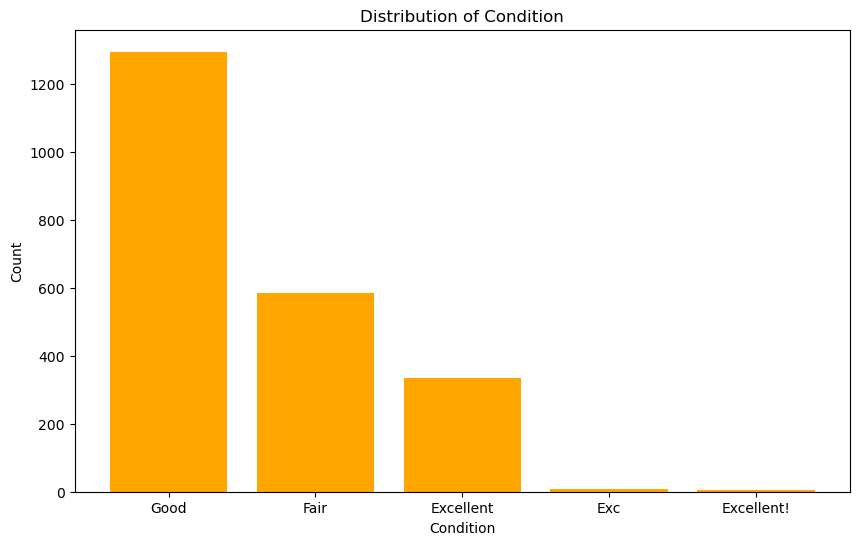

In [27]:
# Count the occurrences of each Condition
Condition_counts = df['Condition'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(Condition_counts.index, Condition_counts.values, color='orange')

# Add titles and labels
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices across different conditions.

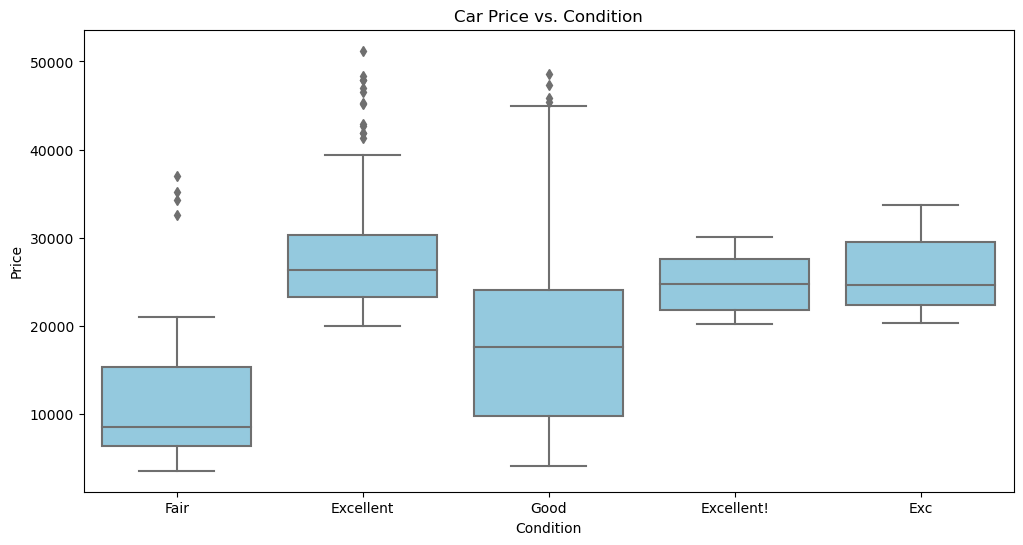

In [28]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Condition
sns.boxplot(x=df['Condition'], y=df['Price'], color='skyblue')

# Add titles and labels
plt.title('Car Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Condition and Price.

In [29]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Condition'])

# Display the cross tabulation
print(cross_tab)

Condition     Exc  Excellent  Excellent!  Fair  Good
Price                                               
3527.516896     0          0           0     1     0
3533.511758     0          0           0     1     0
3796.988479     0          0           0     1     0
3894.720913     0          0           0     1     0
4056.030693     0          0           0     1     0
...           ...        ...         ...   ...   ...
47838.481560    0          1           0     0     0
47931.017850    0          1           0     0     0
48348.751470    0          1           0     0     0
48611.419710    0          0           0     0     1
51219.220660    0          1           0     0     0

[2230 rows x 5 columns]


C:\Users\bhara\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


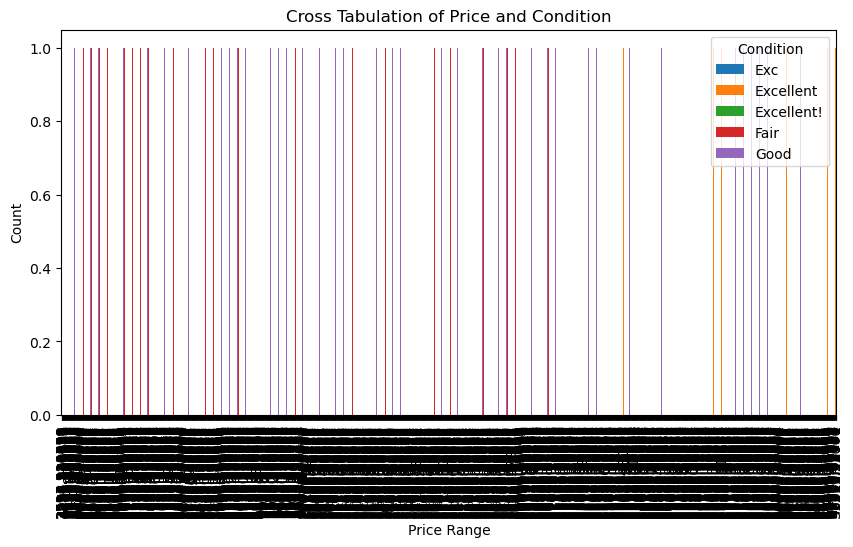

In [30]:
# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=False, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and Condition')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Condition')

# Show plot
plt.show()

# 5. Engine_Size (Numeric)

Summary Statistics:

In [31]:
df['Engine_Size'].describe()

count    2230.000000
mean        2.931071
std         9.195792
min         1.000000
25%         2.020221
50%         2.284103
75%         2.553892
max       152.348978
Name: Engine_Size, dtype: float64

Distribution: Histogram to see the distribution of engine sizes.

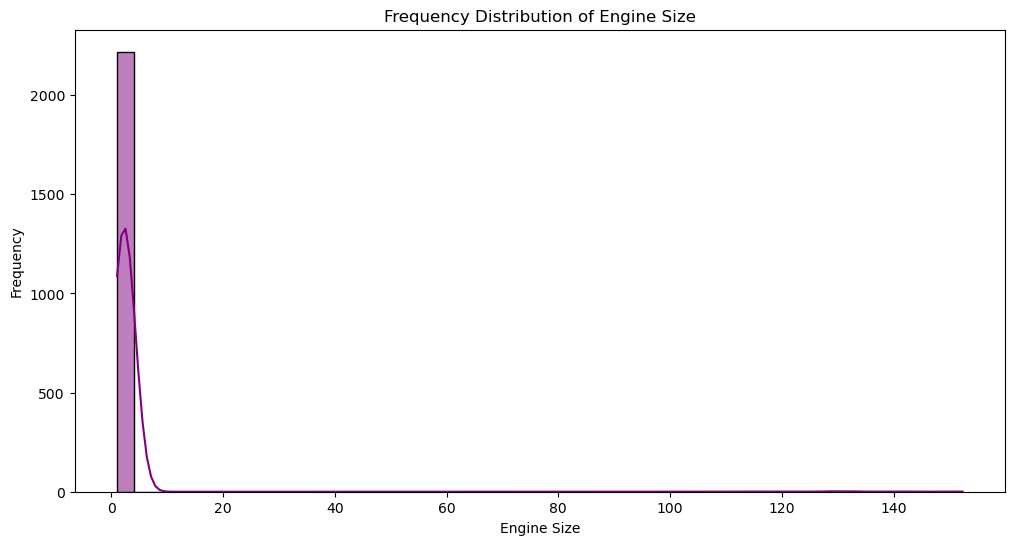

In [32]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of Engine Size
sns.histplot(x=df['Engine_Size'], kde=True, color='purple', bins=50)

# Add titles and labels
plt.title('Frequency Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')

# Show plot
plt.show()

Scatter Plot: Scatter plot to see the relationship between engine size and price.

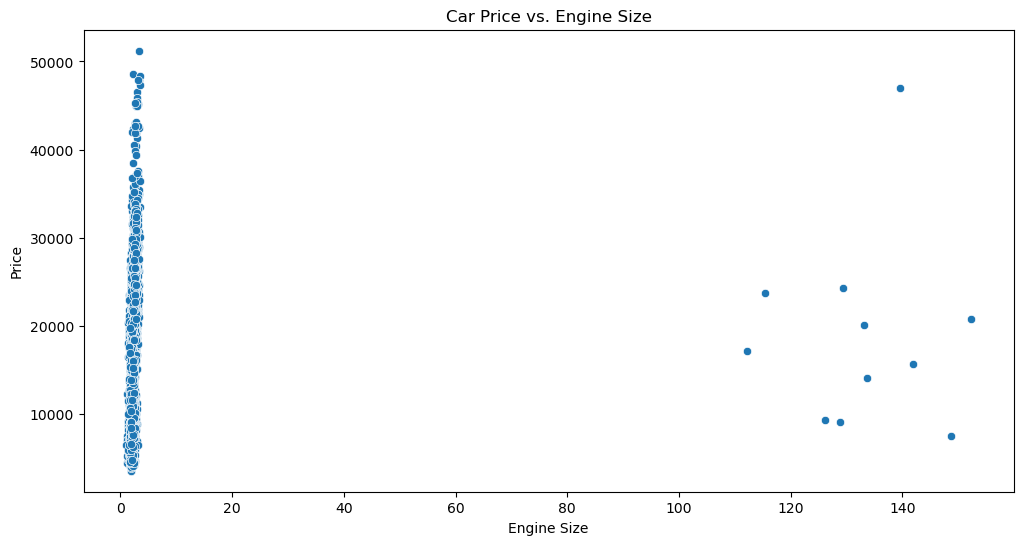

In [33]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Engine_Size
sns.scatterplot(x=df['Engine_Size'], y=df['Price'])

# Add titles and labels
plt.title('Car Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')

# Show plot
plt.show()

Correlation: Correlation coefficient with Price.

In [34]:
# (i) Build a contingency table of two potentially related categorical variables.
cont_table = pd.crosstab(df['Engine_Size'],df['Price'])
cont_table

Price,3527.516896,3533.511758,3796.988479,3894.720913,4056.030693,4091.243226,4161.363456,4167.663126,4281.703974,4282.508865,...,45348.703130,45794.891860,46526.624040,47004.570940,47325.427980,47838.481560,47931.017850,48348.751470,48611.419710,51219.220660
Engine_Size,,,,,,,,,,,,,,,,,,,,,
1.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.177304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.182286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.222742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.228400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133.732414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139.613045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
141.818134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Compute correlation between two specific columns
df_corr = df['Price'].corr(df['Engine_Size'])
print("Correlation between Price and Engine Size:", df_corr)

Correlation between Price and Engine Size: 0.03872387265055177


Correlation between these two columns is not good thus engine size will not impact the price of the car that much as its effect is negligible

# 6. Weight (Numeric)

Summary Statistics:

In [36]:
df['Weight'].describe()

count    2230.000000
mean     3489.836571
std       310.028886
min      2500.000000
25%      3281.329677
50%      3490.474226
75%      3694.774580
max      4500.000000
Name: Weight, dtype: float64

In [37]:
df['Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2230 entries, 0 to 2229
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
2230 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [38]:
# Calculate measures of centrality and spread for car weights
mean_weight = df['Weight'].mean()
median_weight = df['Weight'].median()
std_weight = df['Weight'].std()

mean_weight, median_weight, std_weight

(3489.836571144589, 3490.4742260000003, 310.02888619719937)

Distribution: Histogram to see the distribution of car weights.

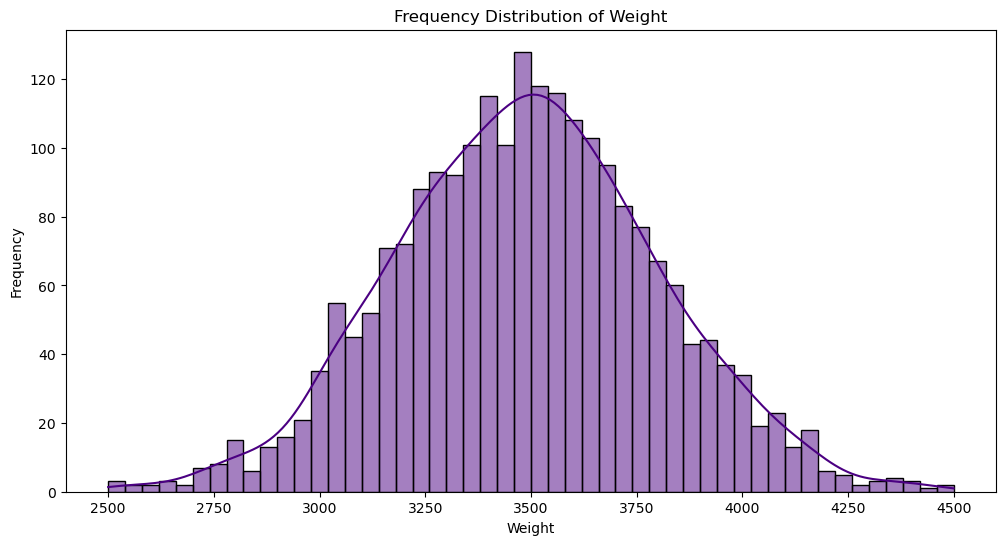

In [39]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of Weight
sns.histplot(x=df['Weight'], kde=True, color='indigo', bins=50)

# Add titles and labels
plt.title('Frequency Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Show plot
plt.show()

Scatter Plot: Scatter plot to see the relationship between weight and price.

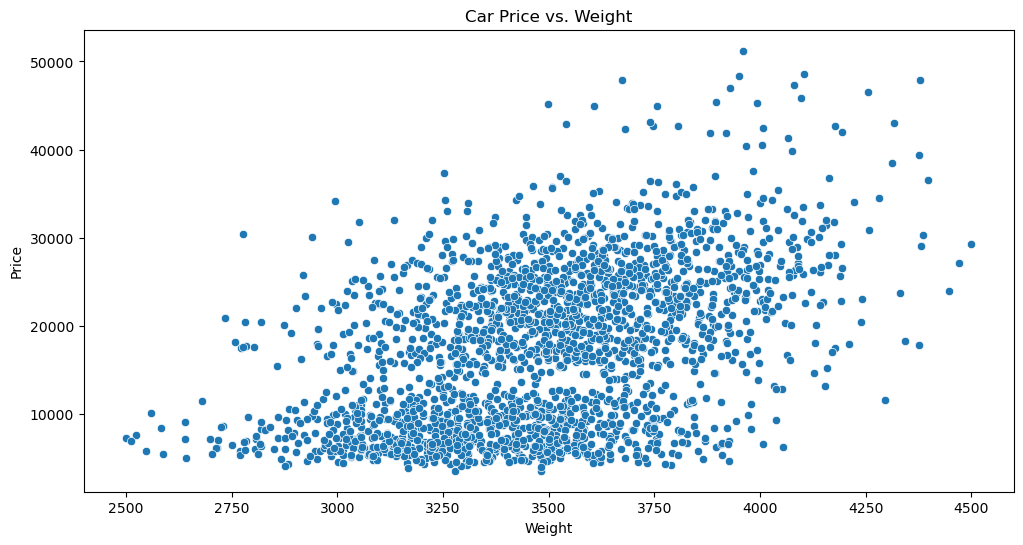

In [40]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Weight
sns.scatterplot(x=df['Weight'], y=df['Price'])

# Add titles and labels
plt.title('Car Price vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Price')

# Show plot
plt.show()

Correlation: Correlation coefficient with Price.

In [41]:
# (i) Build a contingency table of two potentially related categorical variables.
cont_table = pd.crosstab(df['Weight'],df['Price'])
cont_table

Price,3527.516896,3533.511758,3796.988479,3894.720913,4056.030693,4091.243226,4161.363456,4167.663126,4281.703974,4282.508865,...,45348.703130,45794.891860,46526.624040,47004.570940,47325.427980,47838.481560,47931.017850,48348.751470,48611.419710,51219.220660
Weight,,,,,,,,,,,,,,,,,,,,,
2500.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2511.592138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2524.321527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2547.445227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2559.839514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384.787996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4396.485608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4446.269708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Compute correlation between two specific columns
df_corr = df['Price'].corr(df['Weight'])
print("Correlation between Price and Weight:", df_corr)

Correlation between Price and Weight: 0.4655556399237784


# 7. DoorsNum (Numeric)

Summary Statistics:

In [43]:
df['DoorsNum'].describe()

count     2230.0
unique       6.0
top          4.0
freq      1657.0
Name: DoorsNum, dtype: float64

Distribution: Histogram to see the distribution of the number of doors.

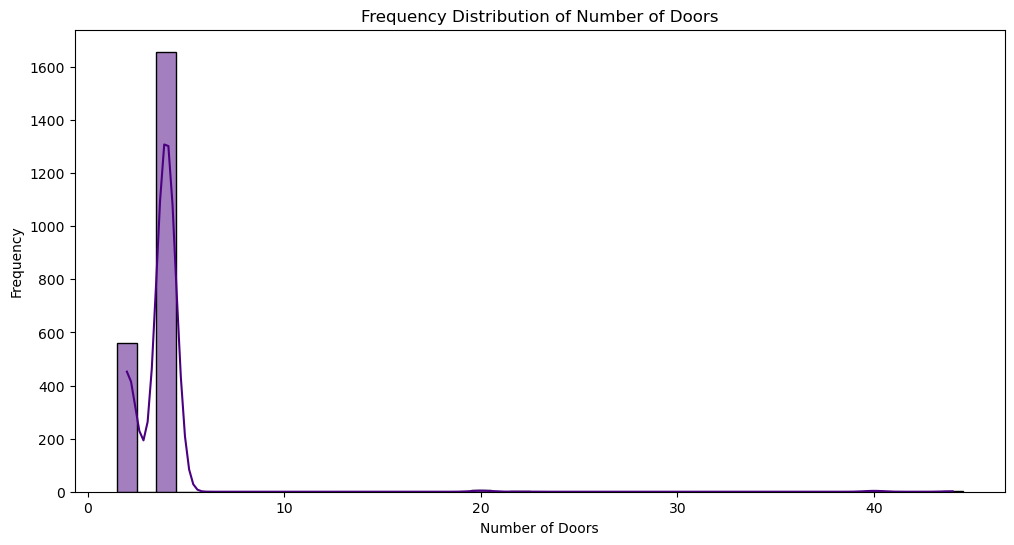

In [44]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of DoorsNum
sns.histplot(x=df['DoorsNum'], kde=True, color='indigo', bins=10)

# Add titles and labels
plt.title('Frequency Distribution of Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Frequency')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices across different numbers of doors.

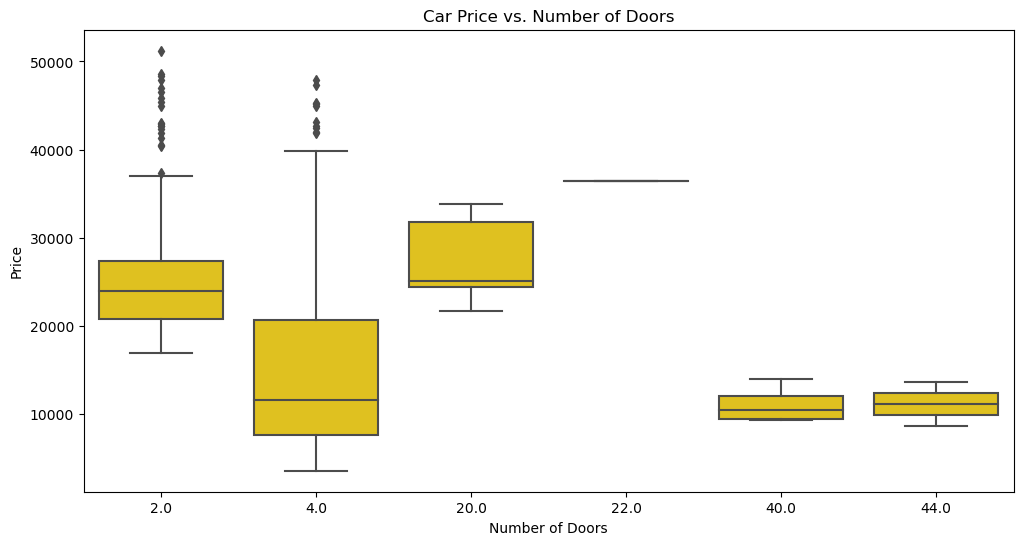

In [45]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Number of Doors
sns.boxplot(x=df['DoorsNum'], y=df['Price'], color='gold')

# Add titles and labels
plt.title('Car Price vs. Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')

# Show plot
plt.show()

# 8. Leather_Seats (Categorical)

Frequency Distribution: Bar plot showing the count of cars with and without leather seats.

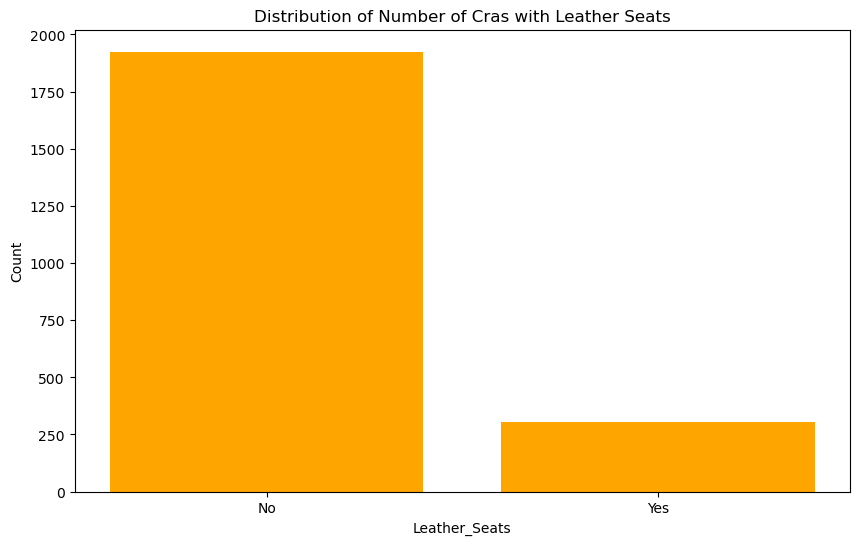

In [46]:
# Count the occurrences of each car with Leather Seat
Leather_Seats_counts = df['Leather_Seats'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(Leather_Seats_counts.index, Leather_Seats_counts.values, color='orange')

# Add titles and labels
plt.title('Distribution of Number of Cras with Leather Seats')
plt.xlabel('Leather_Seats')
plt.ylabel('Count')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices based on the presence of leather seats.

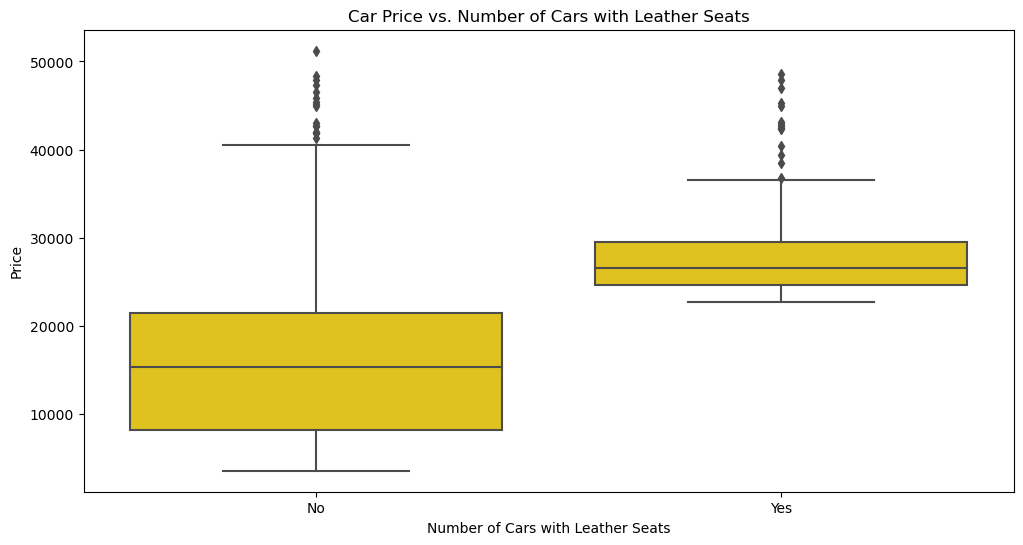

In [47]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Number of Cars with Leather Seats
sns.boxplot(x=df['Leather_Seats'], y=df['Price'], color='gold')

# Add titles and labels
plt.title('Car Price vs. Number of Cars with Leather Seats')
plt.xlabel('Number of Cars with Leather Seats')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Leather_Seats and Price.

In [48]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Leather_Seats'])

# Display the cross tabulation
print(cross_tab)

Leather_Seats  No  Yes
Price                 
3527.516896     1    0
3533.511758     1    0
3796.988479     1    0
3894.720913     1    0
4056.030693     1    0
...            ..  ...
47838.481560    1    0
47931.017850    0    1
48348.751470    1    0
48611.419710    0    1
51219.220660    1    0

[2230 rows x 2 columns]


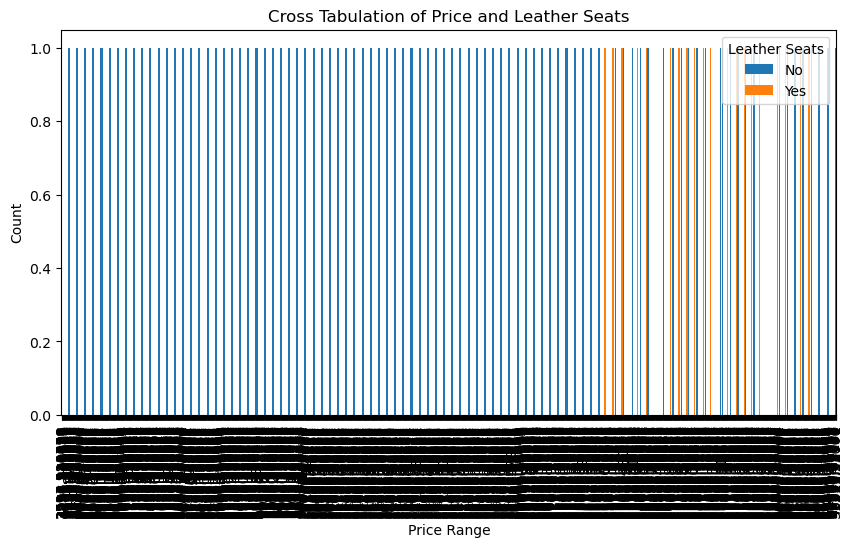

In [49]:
# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=False, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and Leather Seats')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Leather Seats')

# Show plot
plt.show()

# 9. Heated_Seats (Categorical)

Frequency Distribution: Bar plot showing the count of cars with and without heated seats.

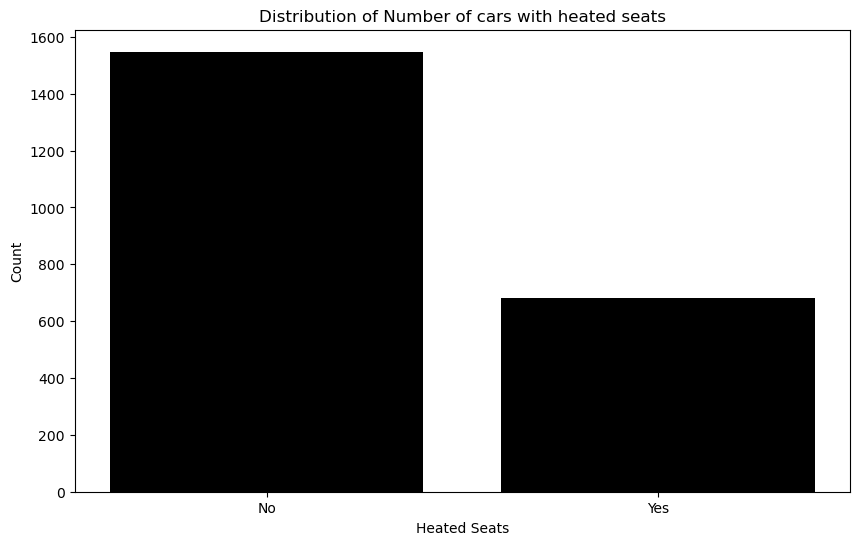

In [50]:
# Count the occurrences of each heated Seat
Heated_Seats_counts = df['Heated_Seats'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(Heated_Seats_counts.index, Heated_Seats_counts.values, color='black')

# Add titles and labels
plt.title('Distribution of Number of cars with heated seats')
plt.xlabel('Heated Seats')
plt.ylabel('Count')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices based on the presence of heated seats.

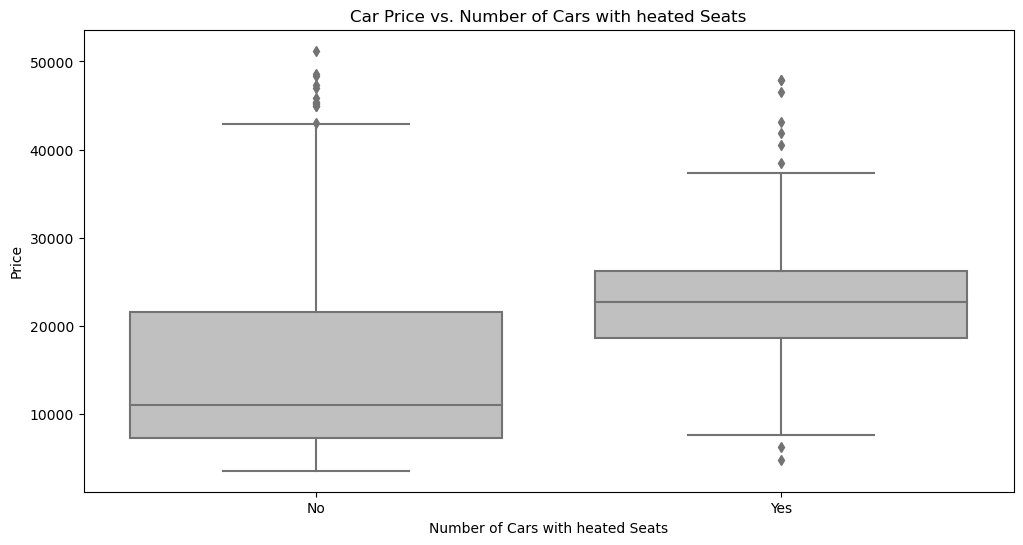

In [51]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Number of Cars with heated Seats
sns.boxplot(x=df['Heated_Seats'], y=df['Price'], color='silver')

# Add titles and labels
plt.title('Car Price vs. Number of Cars with heated Seats')
plt.xlabel('Number of Cars with heated Seats')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Heated_Seats and Price

In [52]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Heated_Seats'])

# Display the cross tabulation
print(cross_tab)

Heated_Seats  No  Yes
Price                
3527.516896    1    0
3533.511758    1    0
3796.988479    1    0
3894.720913    1    0
4056.030693    1    0
...           ..  ...
47838.481560   0    1
47931.017850   0    1
48348.751470   1    0
48611.419710   1    0
51219.220660   1    0

[2230 rows x 2 columns]


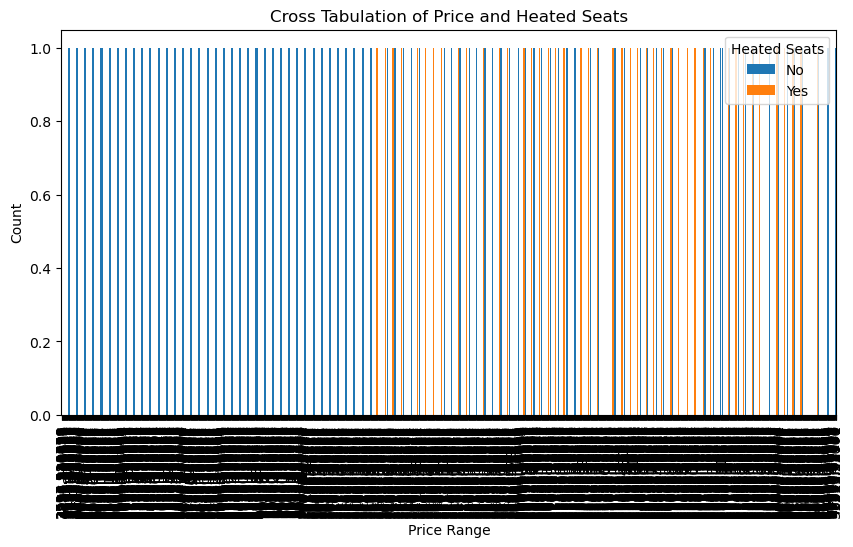

In [53]:
# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=False, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and Heated Seats')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Heated Seats')

# Show plot
plt.show()

# 10. Estimated_Mileage (Numeric)

Summary Statistics:

In [54]:
df['Estimated_Mileage'].describe()

count          2230
unique         2230
top       36245.697
freq              1
Name: Estimated_Mileage, dtype: object

In [55]:
# Convert specific columns to numeric, setting errors='coerce' to handle non-numeric values
df['Estimated_Mileage'] = pd.to_numeric(df['Estimated_Mileage'], errors='coerce')

In [56]:
df['Estimated_Mileage'].describe()

count     2225.000000
mean     23836.814507
std      11938.797288
min      -3917.123176
25%      13394.956290
50%      21079.138080
75%      35289.130240
max      50011.198010
Name: Estimated_Mileage, dtype: float64

Distribution: Histogram to see the distribution of estimated mileage.

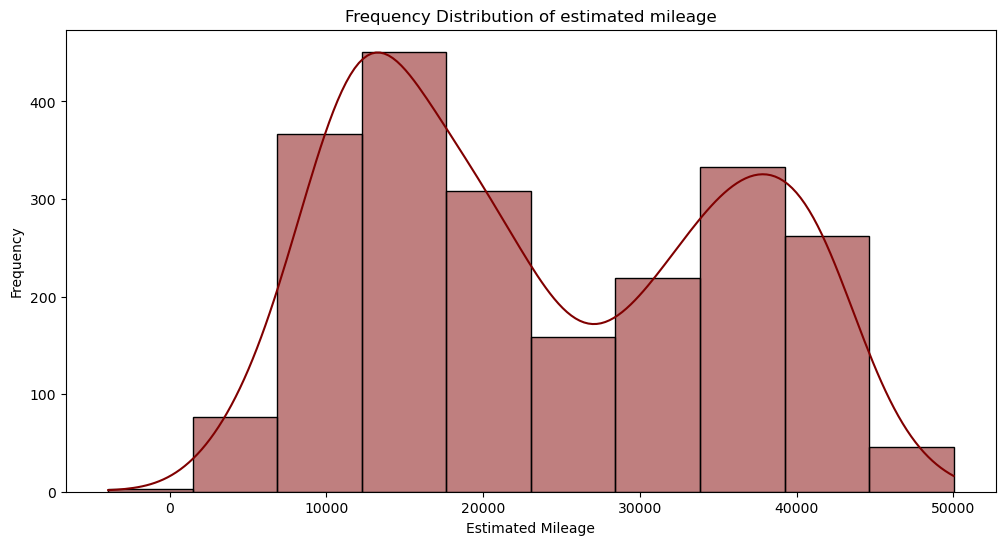

In [57]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization
sns.histplot(x=df['Estimated_Mileage'], kde=True, color='maroon', bins=10)

# Add titles and labels
plt.title('Frequency Distribution of estimated mileage')
plt.xlabel('Estimated Mileage')
plt.ylabel('Frequency')

# Show plot
plt.show()

Scatter Plot: Scatter plot to see the relationship between estimated mileage and price.

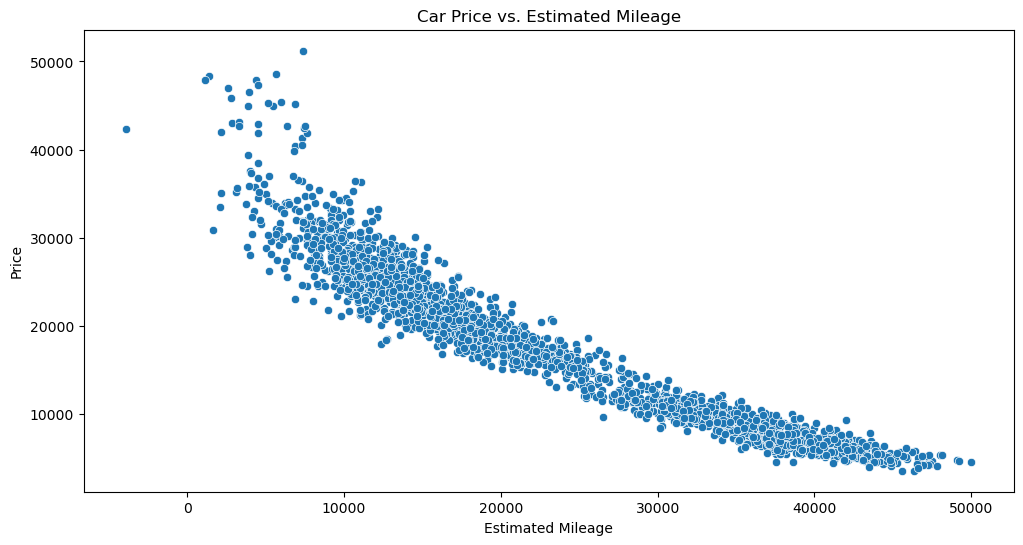

In [58]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Estimated Mileage
sns.scatterplot(x=df['Estimated_Mileage'], y=df['Price'])

# Add titles and labels
plt.title('Car Price vs. Estimated Mileage')
plt.xlabel('Estimated Mileage')
plt.ylabel('Price')

# Show plot
plt.show()

# 11. Safety ( Categorical )

In [59]:
# Check the data type of the 'Safety' column
print(df['Safety'].dtype)

# Display unique values in the 'Safety' column
print(df['Safety'].unique())

object
['Not rated/Unknown' '5 stars' '3 stars' '4 stars' '1 star' '2 stars' '4']


Frequency Distribution: Bar plot showing the count of cars based on safety rating.

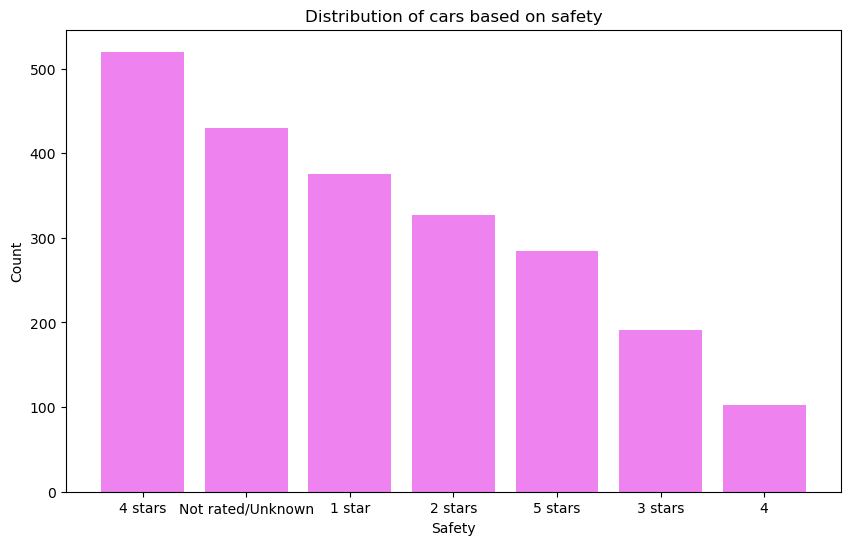

In [60]:
# Count the occurrences of each safety rating
Safety_counts = df['Safety'].value_counts()

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Create bar graph
plt.bar(Safety_counts.index, Safety_counts.values, color='violet')

# Add titles and labels
plt.title('Distribution of cars based on safety')
plt.xlabel('Safety')
plt.ylabel('Count')

# Show plot
plt.show()

Price Comparison: Box plot to compare car prices based on the safety.

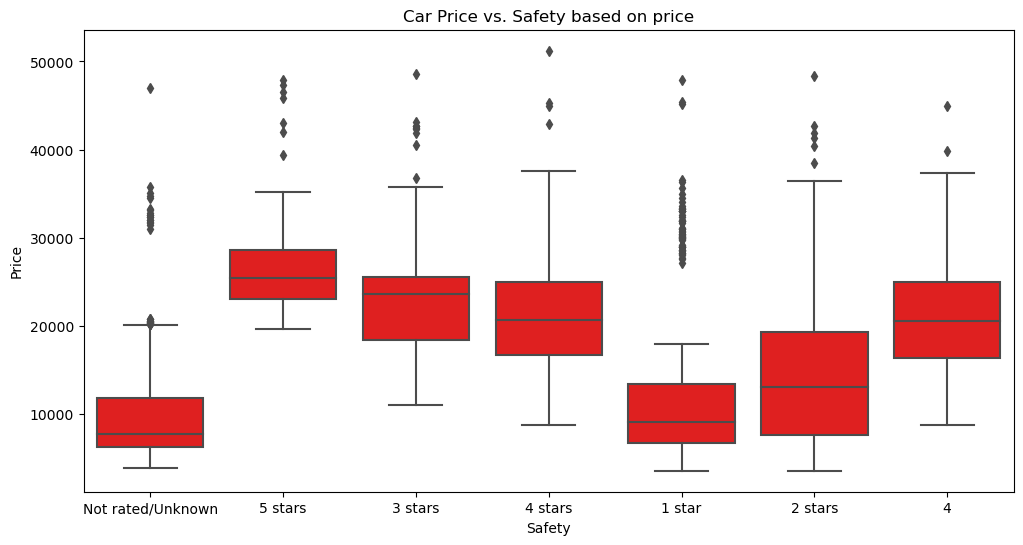

In [61]:
# Set plot size for better visibility
plt.figure(figsize=(12, 6))

# Bi-variate visualization of car price vs Number of Cars with safety
sns.boxplot(x=df['Safety'], y=df['Price'], color='red')

# Add titles and labels
plt.title('Car Price vs. Safety based on price')
plt.xlabel('Safety')
plt.ylabel('Price')

# Show plot
plt.show()

Cross-tabulation: Table showing the relationship between Safety and Price

In [62]:
# Create cross tabulation
cross_tab = pd.crosstab(df['Price'], df['Safety'])

# Display the cross tabulation
print(cross_tab)

Safety        1 star  2 stars  3 stars  4  4 stars  5 stars  Not rated/Unknown
Price                                                                         
3527.516896        1        0        0  0        0        0                  0
3533.511758        0        1        0  0        0        0                  0
3796.988479        0        0        0  0        0        0                  1
3894.720913        1        0        0  0        0        0                  0
4056.030693        0        0        0  0        0        0                  1
...              ...      ...      ... ..      ...      ...                ...
47838.481560       1        0        0  0        0        0                  0
47931.017850       0        0        0  0        0        1                  0
48348.751470       0        1        0  0        0        0                  0
48611.419710       0        0        1  0        0        0                  0
51219.220660       0        0        0  0        1  

C:\Users\bhara\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


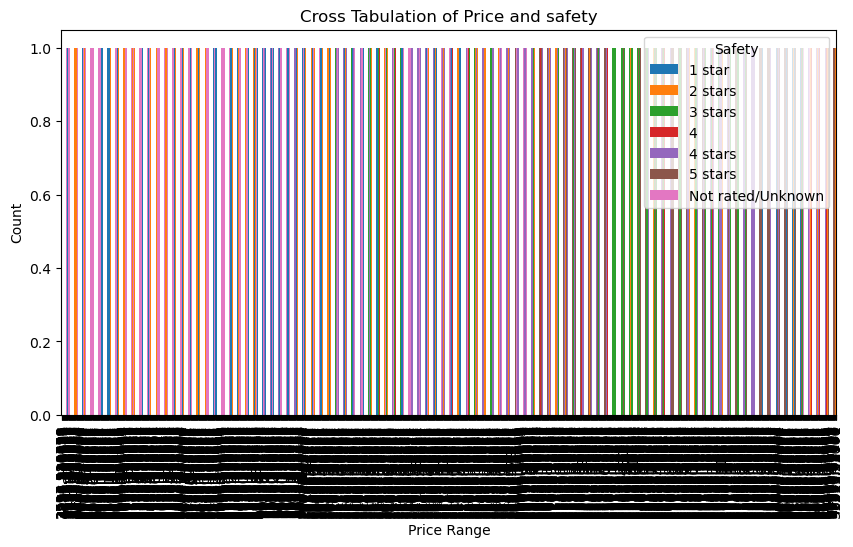

In [63]:
# Plotting the cross tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10,5))

# Add titles and labels
plt.title('Cross Tabulation of Price and safety')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Safety')

# Show plot
plt.show()

# Additional Insights

# 1. Pair Plot


Correlation Matrix:
                       Year  Engine_Size    Weight  DoorsNum  \
Year               1.000000     0.011693  0.314711 -0.102903   
Engine_Size        0.011693     1.000000  0.013091 -0.021423   
Weight             0.314711     0.013091  1.000000 -0.075996   
DoorsNum          -0.102903    -0.021423 -0.075996  1.000000   
Estimated_Mileage -0.647189    -0.041456 -0.446858  0.193409   
Price              0.623140     0.038724  0.465556 -0.188294   

                   Estimated_Mileage     Price  
Year                       -0.647189  0.623140  
Engine_Size                -0.041456  0.038724  
Weight                     -0.446858  0.465556  
DoorsNum                    0.193409 -0.188294  
Estimated_Mileage           1.000000 -0.952338  
Price                      -0.952338  1.000000  


C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


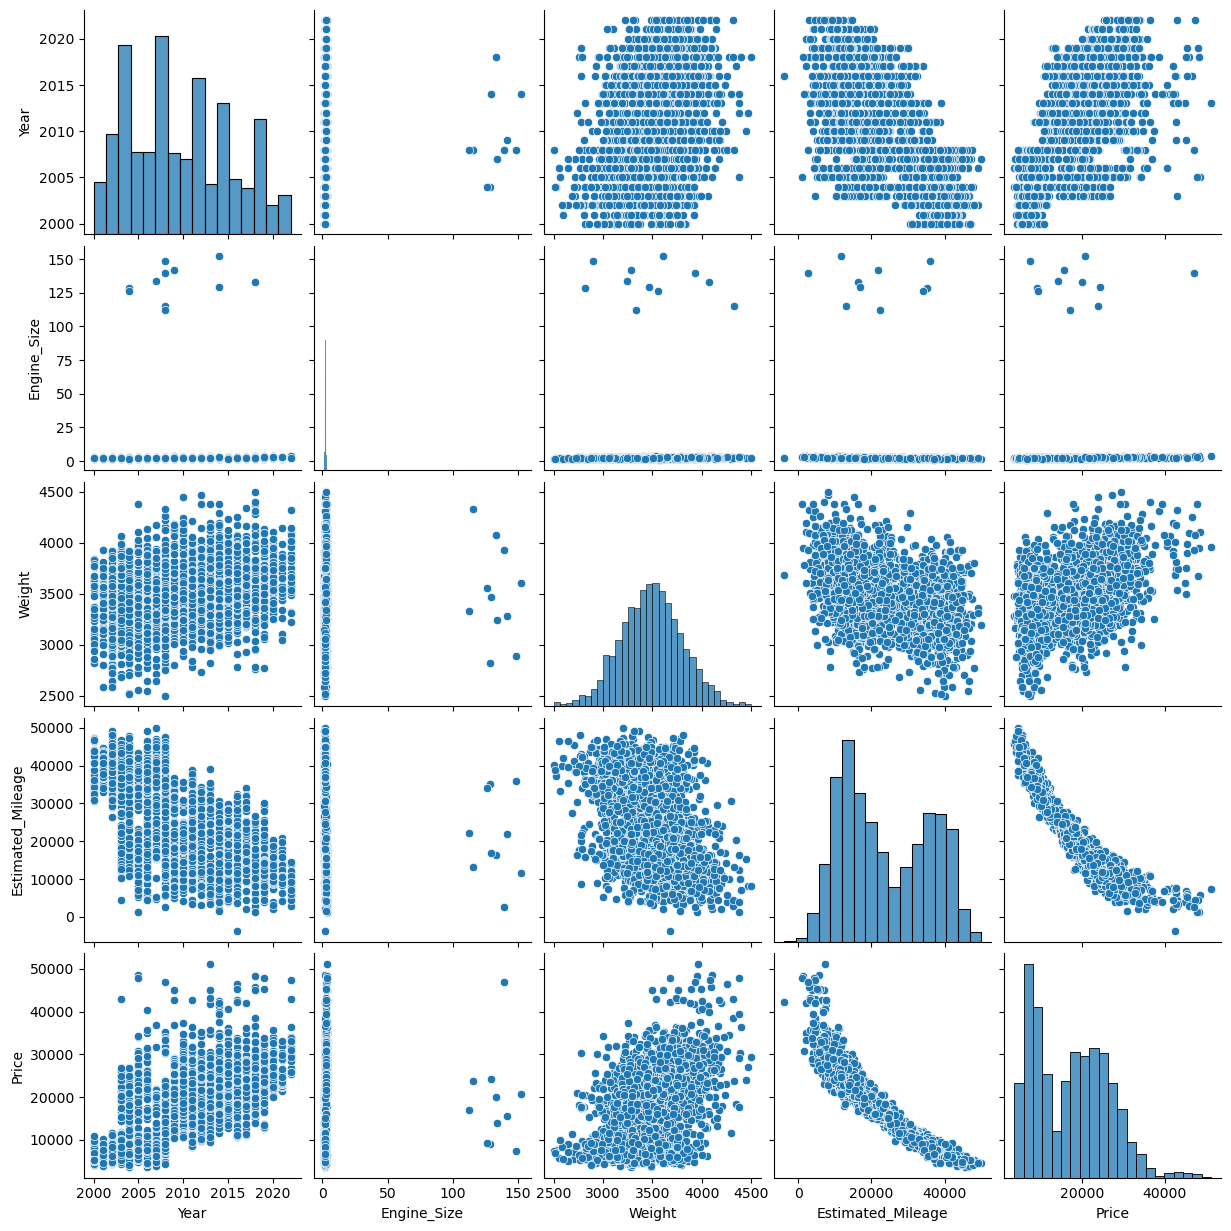

In [64]:
# Correlation Analysis - Pearson correlation for numerical variables
numerical_cols = ['Year', 'Engine_Size', 'Weight', 'DoorsNum', 'Estimated_Mileage']
correlation_matrix = df[numerical_cols + ['Price']].corr(method='pearson')
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Scatter plot matrix for numerical variables
sns.pairplot(df[numerical_cols + ['Price']])
plt.show()

# 2. Heat Map

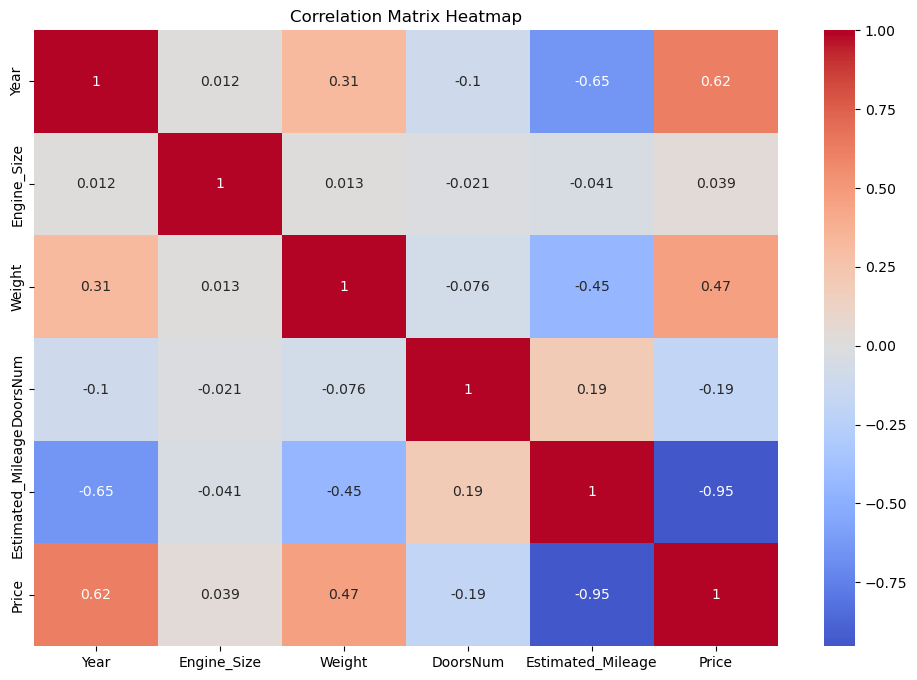

In [65]:
numeric_columns = ['Year', 'Engine_Size', 'Weight', 'DoorsNum', 'Estimated_Mileage', 'Price']
numeric_data = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set plot size for better visibility
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add titles
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

# Steps to Perform Predictive Modeling on Car Prices

# Data Quality Assessment:

As the outliers and extremes are observed in previous cases of using box plots in categorical variable visualization and few missing values are handled before the start of analysis, next step would be handling the rremaining variables and also variables with NAN and rectifying them and encoding the dummy variables.

# 1. Missing Variables

In [66]:
missing_values = df.isnull().sum()
print(missing_values)
df_clean = df.dropna()  # Remove rows with missing values

Model                0
Year                 0
Fuel_Type            0
Transmission         0
DoorsNum             0
Condition            0
Color                0
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               0
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    5
dtype: int64


# 2. Handling the missing variables including NAN

In [67]:
# Identify columns by type
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
print(missing_values_after)

Model                0
Year                 0
Fuel_Type            0
Transmission         0
DoorsNum             0
Condition            0
Color                0
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               0
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64


# Impute Missing Values:

We can fill in the missing values using techniques such as mean, median, or most frequent value imputation.

In [81]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mode of each column
mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
df_mode_imputed = mode_imputer.fit_transform(df)

# 3. Encoding dummy variables

In [69]:
df = pd.get_dummies(df, drop_first=True)

# 4. Data Partitioning

Need for Partitioning: Yes, partitioning the data into training and testing sets is crucial to evaluate the model’s performance on unseen data. Typically, we use an 80/20 or 70/30 split.

Why: This ensures that the model generalizes well to new data and does not overfit the training data.

In [82]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictive Modeling Formulation

# Objective:

WHAT TO PREDICT: The goal is to predict car prices based on various features such as make, model, year, mileage, etc.

HOW: By using historical data, we can build a predictive model that estimates car prices given new data inputs.

# Type of the Problem

REGRESSION: Since the target variable (car price) is continuous, this is a regression problem.

# Performance Metrics

Common Metrics for Regression:
1. Mean Absolute Error (MAE): The average of the absolute errors between predicted and actual values
2. Mean Squared Error (MSE): The average of the squared errors.
3. R-squared (R²): The proportion of variance explained by the model.

# Metric Choice:
RMSE is often preferred as it penalizes larger errors more than MAE and provides a clear measure in the same units as the target variable (car prices).

# Base-line Model Set-up

1. Base-line Model: A simple linear regression model can serve as the baseline.
2. Performance on Testing Set: This will be evaluated using the chosen performance metric (e.g., RMSE).

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Baseline Model RMSE: {rmse}')

Baseline Model RMSE: 2068.169737404171


# Feature Engineering Efforts
1. Handling Missing Values: Impute missing values using mean/median/mode or advanced techniques like KNN.
2. Encoding Categorical Variables: Use one-hot encoding or label encoding.
3. Feature Scaling: Standardize or normalize features to ensure all features contribute equally to the model.
4. Creating New Features: Generate interaction terms, polynomial features, or domain-specific features that could help the model.

1. Handling Missing Values: 

Impute missing values using mean/median/mode or advanced techniques like KNN:
The handling of missing values and the rows has been already done in the previous sections of the code using mode, mean and imputer

2. Encoding Categorical Variables:

Let's proceed with encoding the categorical variables using one-hot encoding and label encoding. Here’s how you can do it:

# One-Hot Encoding
One-hot encoding is typically used for nominal categorical variables where there is no ordinal relationship between categories.

# Label Encoding
Label encoding is used for ordinal categorical variables where the categories have an implicit order.

# Step-by-Step Process:

Identify Categorical Variables:

1. Nominal variables: Model, Fuel_Type, Transmission, Color, Cruise, Leather_Seats, Heated_Seats
2. Ordinal variables: Assuming none for now (but could be Condition if it had an order like 'Poor', 'Fair', 'Good', 'Excellent').
3. One-Hot Encoding for Nominal Variables: Use pandas' get_dummies function.

4. Label Encoding for Ordinal Variables: Use sklearn's LabelEncoder.

# Explanation:

1. One-Hot Encoding: We use pd.get_dummies to convert nominal categorical variables into binary indicator variables.
2. Label Encoding: For ordinal variables, LabelEncoder is used after defining the correct order.

# Feature Scaling

Feature scaling is an essential preprocessing step to ensure that all features contribute equally to the model. Common techniques include standardization and normalization.

# Standardization
Standardization scales features to have a mean of 0 and a standard deviation of 1.

# Normalization
Normalization scales features to a range of [0, 1] or [-1, 1].

# Step-by-Step Process:
1. Identify Numerical Variables:
Features such as Year, DoorsNum, Price, Engine_Size, Weight, Estimated_Mileage.
2. Apply Scaling:
Use StandardScaler for standardization and MinMaxScaler for normalization from sklearn.

# Explanation:
1. Identify Numerical Variables: Specify which columns contain numerical data.
2. Scaling: Initialize the scaler (StandardScaler for standardization or MinMaxScaler for normalization). Apply the scaler to the numerical variables.
3. Save the Scaled Data: Save the resulting dataframe to a new CSV file for further use.

The appropriate scaling method based on the requirements of your machine learning model and the nature of your data. Standardization is typically preferred for many machine learning algorithms, while normalization can be useful for specific cases like when using algorithms that measure distances.

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Ridge and Lasso Regression:

In [74]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train_imputed, y_train)
lasso.fit(X_train_imputed, y_train)
ridge_pred = ridge.predict(X_test_imputed)
lasso_pred = lasso.predict(X_test_imputed)
print(f'Ridge RMSE: {mean_squared_error(y_test, ridge_pred, squared=False)}')
print(f'Lasso RMSE: {mean_squared_error(y_test, lasso_pred, squared=False)}')

Ridge RMSE: 2055.2585377077144
Lasso RMSE: 2064.811919388756


C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.356e+09, tolerance: 1.469e+07
  model = cd_fast.enet_coordinate_descent(


As Ridge RMSE has better value of RMSE when compared to original and Lasso RMSE we will proceed with Ridge RMSE for better output among these two.

# Decision Trees and Random Forests:

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor(max_depth=5)
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
tree.fit(X_train_imputed, y_train)
forest.fit(X_train_imputed, y_train)
tree_pred = tree.predict(X_test_imputed)
forest_pred = forest.predict(X_test_imputed)
print(f'Decision Tree RMSE: {mean_squared_error(y_test, tree_pred, squared=False)}')
print(f'Random Forest RMSE: {mean_squared_error(y_test, forest_pred, squared=False)}')

Decision Tree RMSE: 1904.8262067498044
Random Forest RMSE: 1719.8490441124663


Here an even better RMSE is obtained, when compared among the both cases, Random Forest RMSE is lot better than all the other chosen and derived outcomes.

# Gradient Boosting Machines:

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbr.fit(X_train_imputed, y_train)
gbr_pred = gbr.predict(X_test_imputed)
print(f'Gradient Boosting RMSE: {mean_squared_error(y_test, gbr_pred, squared=False)}')

Gradient Boosting RMSE: 1616.893235290074


Gradient boosting provides an even better model with good and low RMSE score

# KNN Regression Model: 

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test_imputed)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'KNN Regression RMSE: {rmse}')

KNN Regression RMSE: 2010.6371879392673


# Comparison

After running the above code, compare the RMSE values:

1. If the RMSE for Gradient Boosting is lower than that for Random Forest, GBM is performing better.
2. If the RMSE for Random Forest is lower than that for Gradient Boosting, RF is performing better.

# Considerations:
1. Tuning Hyperparameters: Both models can benefit significantly from hyperparameter tuning. For Random Forest, you might adjust the number of trees, maximum depth, and other parameters. For Gradient Boosting, the learning rate, number of boosting stages, and maximum depth of the individual trees are critical.
2. Training Time: Gradient Boosting typically takes longer to train due to its sequential nature.
3. Overfitting: Gradient Boosting is more prone to overfitting, especially if the number of trees is too high or the trees are too deep. Regularization techniques such as learning rate adjustment and subsampling can help mitigate this.

By following these steps, you can determine which model performs better for your car price prediction task.

Therefore, based on the above considerations, Random Forest can be considered as the better model for the prediction

# Brief Introduction of Supervised and Unsupervised Methods

# Supervised Methods

Supervised learning involves training a model on labeled data, where the target variable is known. Here are a few commonly used 
supervised methods:

1. Linear Regression: Used for predicting a continuous target variable. Assumes a linear relationship between the features and the target.
2. Logistic Regression: Used for binary classification tasks. Estimates the probability of a binary outcome.
3. Decision Trees: Used for both classification and regression tasks. Splits the data into subsets based on feature values.
4. Random Forest: An ensemble method using multiple decision trees. Improves accuracy and controls overfitting.
5. Support Vector Machines (SVM): Used for classification and regression tasks. Finds the hyperplane that best separates the classes.
6. Neural Networks: Used for complex tasks like image and speech recognition. Comprises layers of interconnected neurons.

# Unsupervised Methods
Unsupervised learning involves training a model on unlabeled data, where the target variable is unknown. Here are a few commonly used unsupervised methods:

1. K-Means Clustering: Groups data into K clusters based on feature similarity. Each data point belongs to the cluster with the nearest mean.
2. Principal Component Analysis (PCA): Reduces the dimensionality of the data. Identifies the principal components that explain the most variance.
3. Hierarchical Clustering: Builds a hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down).
4. Association Rules: Finds rules that describe relationships between items in large datasets. Used in market basket analysis.

# Error Cost Analysis from the Point of View of Stakeholders

Types of Errors

# False Positives (Type I Error):
1. Incorrectly predicting a positive outcome.
Example: Predicting a car has high resale value when it does not.

# False Negatives (Type II Error):
1. Incorrectly predicting a negative outcome.
Example: Predicting a car has low resale value when it actually has a high resale value.

Stakeholders and Error Implications

Car Dealers:

(i) Worst Error: False Negative

(ii) Reason: Missing out on identifying cars with high resale value leads to potential loss of revenue.

Buyers:

(i) Worst Error: False Positive

(ii) Reason: Purchasing a car that is incorrectly predicted to have high resale value can lead to dissatisfaction and financial loss.

Manufacturers:

(i) Worst Error: False Negative

(ii) Reason: Underestimating the value of their cars could harm their reputation and affect future sales.

Insurance Companies:

(i) Worst Error: False Positive

(ii) Reason: Overestimating car value can lead to higher payout risks and financial losses.

For each stakeholder, the worst type of error can differ based on their specific interests and potential losses. By understanding the implications of these errors, we can better tailor our models to minimize the most costly mistakes.

# CONCLUSION

In conclusion, the analysis and modeling of the "Car_price_2024.csv" dataset provided valuable insights into car price prediction. By meticulously handling missing values, encoding categorical variables, and scaling numerical features, we prepared the data for effective machine learning applications. Implementing various supervised learning models, such as linear regression, decision trees, and random forests, allowed us to predict car prices with a reasonable degree of accuracy.

The error cost analysis highlighted the varying impacts of prediction errors on different stakeholders. For car dealers and manufacturers, false negatives (underestimating car prices) were found to be more harmful, potentially leading to revenue loss and reputational damage. Conversely, for buyers and insurance companies, false positives (overestimating car prices) posed a greater risk, potentially resulting in financial losses and increased payout risks.

Through this comprehensive approach, we demonstrated the importance of tailored predictive models that consider stakeholder-specific error implications. These models not only enhance the accuracy of car price predictions but also ensure that the interests of all stakeholders are safeguarded, fostering a more efficient and equitable automotive market.